# 속성 데이터 분류 Template

# 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/car_classification.csv

--2021-12-09 11:11:41--  https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/car_classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54766 (53K) [text/plain]
Saving to: ‘car_classification.csv’

car_classification. 100%[===================>]  53.48K  --.-KB/s    in 0.005s  

2021-12-09 11:11:41 (10.1 MB/s) - ‘car_classification.csv’ saved [54766/54766]



In [3]:
raw_data = pd.read_csv("car_classification.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,:7]
y = data[:,7]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [4]:
raw_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,class
0,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,0
1,-1.082115,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,0
2,-0.697747,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,0
3,-0.953992,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,0
4,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,0


In [5]:
print(train_x[:5])
print(train_y[:5])

[[ 0.04536596 -0.86291079 -0.41485406 -0.50581452 -0.14431812  0.74620329
   0.54846706]
 [-1.46648397  1.48205303  2.49023356  3.13138426  2.32329864 -1.64608561
  -0.80885042]
 [-1.08211534  0.30957112  0.60766033  0.14368526  0.88581769  1.25365851
  -0.26592342]
 [ 0.71160491 -0.86291079 -0.93088936 -0.76561444 -0.94959001  0.16625446
  -0.26592342]
 [-1.21023822  1.48205303  1.96464205  1.83238469  1.74995448 -1.4648516
  -1.35177741]]
[0. 0. 0. 2. 0.]


In [6]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 7)
(313,)
(79, 7)
(79,)


# Template

- 출력값 혹은 레이블링 값은 0, 1, 2와 같은 카테고리 인덱스
- 입력층 노드 수는 특질 수
- 출력층 노드 수는 카테고리 수
- 출력층 활성화 함수는 softmax
- 사용하는 loss는 ‘sparse_categorical_crossentropy’


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


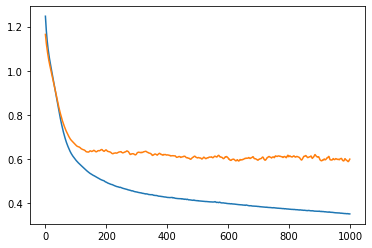

3/3 [==============================] - 0s 4ms/step - loss: 0.4703 - acc: 0.7468
loss= 0.47027987241744995
acc= 0.746835470199585


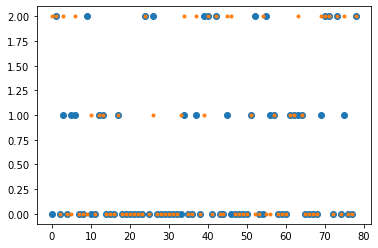

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

model = keras.Sequential()
model.add(Input(7)) # 수정할 곳. 노드수를 입력 데이터 특질 수로 설정.
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax")) # 수정할 곳. 노드수를 카테고리 수로 설정.

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)



y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()

# Template 상세

## 임포팅

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input


## 모델 정의


In [9]:
model = keras.Sequential()
model.add(Input(7)) # 수정할 곳. 노드수를 입력 데이터 특질 수로 설정.
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax")) # 수정할 곳. 노드수를 카테고리 수로 설정.

## loss, optimizer 설정

In [10]:
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

## 모델 보기

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                80        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [12]:
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

## loss  그리기

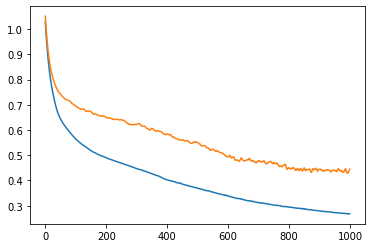

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 평가

In [14]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)

3/3 [==============================] - 0s 3ms/step - loss: 0.4771 - acc: 0.7468
loss= 0.47714465856552124
acc= 0.746835470199585


## 예측

In [15]:
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

## 영상 분류 결과 그리기

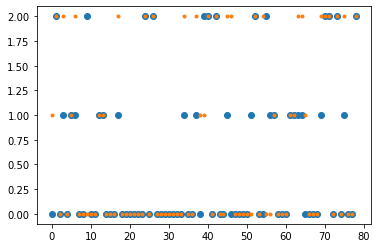

In [16]:
plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()